In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Modifying prior

In [3]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

weight = d['weight']
mean_weight = weight.mean()
c_weight = weight - mean_weight
d['c_weight'] = abs(c_weight)
d.head()

R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [8]:
df = sim.draws_pd()
df['beta'] = abs(df['beta'])
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,0.777181,23.208300,235.125,200.203,238.448,260.841,285.880,...,270.570,287.568,279.8830,250.4730,212.640,232.514,238.9820,263.309,252.490,261.092
1,0.0,0.0,154.022,0.006780,0.086958,154.127,154.085,154.081,154.116,154.117,...,154.154,153.917,153.8390,153.9010,153.829,153.954,153.8160,153.896,154.015,153.893
2,0.0,0.0,169.461,1.138640,20.358900,198.298,165.210,165.360,180.525,175.807,...,188.330,125.324,182.7000,158.3170,190.921,150.838,170.4750,158.941,148.569,153.309
3,0.0,0.0,158.357,0.254452,6.415610,166.884,154.031,156.773,151.960,156.568,...,158.201,155.518,156.9450,163.5440,151.423,151.075,159.7840,150.891,156.473,151.490
4,0.0,0.0,158.131,1.671020,9.955320,132.145,152.858,151.555,152.270,173.474,...,198.339,196.352,176.6400,186.3070,183.774,181.269,181.0830,194.531,193.327,180.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,1.261300,6.017940,167.690,152.612,163.286,163.328,164.977,...,183.878,166.162,186.4600,179.7580,198.171,181.011,182.9480,196.400,181.456,178.390
996,0.0,0.0,196.362,1.223380,10.413300,203.343,203.302,192.915,199.637,184.025,...,209.449,220.630,220.6760,197.8680,225.495,212.147,195.7450,231.466,214.517,216.410
997,0.0,0.0,172.792,0.272051,76.805200,135.376,268.820,233.764,180.520,195.701,...,118.420,135.646,214.5330,30.1897,177.275,231.797,80.9501,190.500,107.176,130.593
998,0.0,0.0,126.115,0.987160,23.204300,146.850,132.058,122.580,140.068,157.048,...,133.871,136.261,97.5317,121.9170,167.856,137.401,169.5760,118.080,111.544,148.882


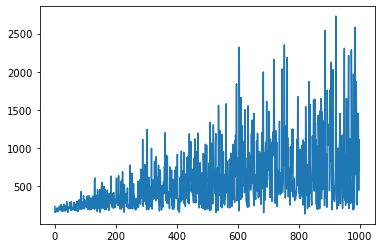

In [9]:
b = df['alpha']
m = df['beta']
x = np.arange(len(df))

y = m*x + b

plt.plot(x,y)